## Atividade 1
Crie um dataset que envolva apenas o indicador GDP e persista em um arquivo, sem as colunas "Indicator Name" e "Indicator Code"

In [6]:
import pandas as pd

caminho = './'
arquivo = 'dataset_bancomundial.csv'

dataset_dados = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de um único termo em uma coluna
dataset_gpd = dataset_dados[dataset_dados['Indicator Name'].str.contains('GDP \(Current USD\)')]

print("Antes de remover haviam essas colunas.")
display(dataset_gpd.head(0))

dataset_gpd = dataset_gpd.drop(['Indicator Name', 'Indicator Code'], axis = 1)
print("Depois de removido há as seguintes colunas.")
display(dataset_gpd.head(0))

dataset_gpd.to_csv('dataset_gpd_ex1.csv', sep = ';', decimal = ',')


Antes de remover haviam essas colunas.


,index,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


Depois de removido há as seguintes colunas.


,index,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


## Atividade 2
Selecione os países da América do Sul e crie um novo dataset, persistindo em arquivo

In [7]:
import pandas as pd

caminho = './'
arquivo = 'dataset_bancomundial_paises.csv'

codigo_paises_latinos = ['ARG', 'BRA', 'BOL',  'CHL', 'COL', 'ECU', 'GUY', 'PER', 'PRY', 'SUR', 'URY', 'VEN']

dataset_paises = pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

# filtrar ocorrencias de varios termos em uma coluna
dataset_paises_latinos = dataset_paises.loc[pd.Series(dataset_paises['Country Code'].isin(codigo_paises_latinos))]

dataset_paises_latinos.to_csv('dataset_paises_latinos_ex2.csv', sep = ';', decimal = ',')

## Atividade 3
Crie um gráfico de controle, considerando a média e uma amplitude de 2 vezes o desvio padrão da para a série com o GDP para todos os países da América do Sul;

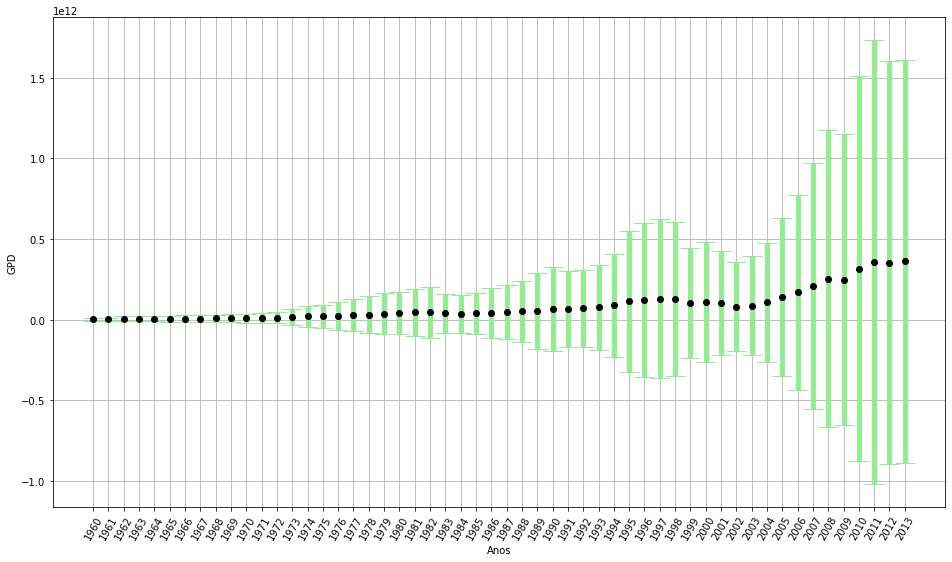

In [93]:
import pandas as pd
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

caminho = './'
arquivo_dados = 'dataset_gpd_ex1.csv'
arquivo_paises_latinos = 'dataset_paises_latinos_ex2.csv'

def lendo_arquivo(arquivo: str):
    return pd.read_csv(caminho + arquivo, sep = ';', decimal = ',')

dataset_dados = lendo_arquivo(arquivo_dados)
dataset_paises_latinos = lendo_arquivo(arquivo_paises_latinos)
codigo_paises_latinos = dataset_paises_latinos['Country Code']

dataset_registros = dataset_dados.loc[pd.Series(dataset_dados['Country Code'].isin(codigo_paises_latinos))]

dataset_registros.reset_index(inplace = True, drop = True)
 
# deletando primeira coluna sem nome 
dataset_registros = dataset_registros.iloc[: , 1:]
    
# apagando colunas
dataset_registros = dataset_registros.drop(['index', 'Country Name', 'Country Code'], axis = 1) 
 
mean_GDP = dataset_registros.mean(numeric_only = True, skipna = True, axis = 0) 
std_GDP = dataset_registros.std(numeric_only = True, skipna = True, axis = 0) 

resultado = pd.DataFrame({'Média': mean_GDP, 'Desvio': std_GDP}).reset_index() 

x = resultado['index']  
y = resultado['Média'] 
e = resultado['Desvio']

plt.figure(figsize=(16, 9))
 
plt.errorbar(x, y, e * 2, fmt = 'o', color = 'black', 
            ecolor = 'lightgreen', elinewidth = 5, capsize=10)
plt.grid()
plt.xticks(rotation = 60)
plt.xlabel("Anos")
plt.ylabel("GPD")
plt.show()
 
